In [2]:
!nvidia-smi

Thu Oct 12 20:23:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     On   | 00000000:18:00.0  On |                  Off |
| 33%   34C    P8    18W / 260W |    410MiB / 49152MiB |     14%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
HOME = os.getcwd()             

In [4]:
!mkdir {HOME}/images

In [5]:
%cd {HOME}/images

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg

/home/dhowarth/repos/supervision/images


In [6]:
import cv2

IMAGE_PATH = f"{HOME}/images/dog.jpeg"

image = cv2.imread(IMAGE_PATH)

In [8]:
import supervision.detection as detection
import supervision.annotators.core as annotators

In [9]:
from ultralytics import YOLO

In [10]:
model = YOLO('yolov8s.pt')
result = model(image, verbose=False)[0]
detections = detection.core.Detections.from_ultralytics(result)

In [11]:
detections

Detections(xyxy=array([[     59.891,      250.41,      647.94,      1272.8],
       [    0.64746,      350.21,      498.83,      1277.3],
       [      290.2,      587.37,      533.97,      1252.2],
       [     626.96,      734.28,      699.47,      788.35]], dtype=float32), mask=None, confidence=array([    0.79679,     0.69055,     0.68981,     0.44159], dtype=float32), class_id=array([16,  0, 26,  2]), tracker_id=None)

In [18]:
box_annotator = detection.annotate.BoxAnnotator()

annotated_image = box_annotator.annotate(image.copy(), detections=detections)

In [20]:
from supervision.utils.notebook import plot_image

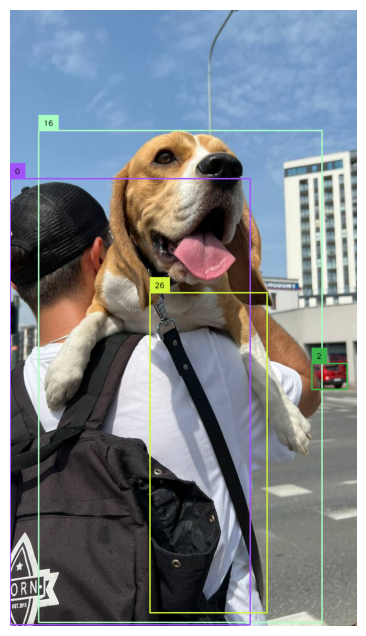

In [21]:
plot_image(image=annotated_image, size=(8, 8))

In [23]:
# triangle annotator 
triangle_annotator = annotators.TriangleMarkerAnnotator()
tri_annotated_image = triangle_annotator.annotate(image.copy(), detections=detections)

ValueError: too many values to unpack (expected 2)

In [27]:
from supervision.geometry.core import Position

In [28]:
detections.get_anchor_coordinates(Position.TOP_CENTER)

array([[     353.91,      250.41],
       [     249.74,      350.21],
       [     412.09,      587.37],
       [     663.21,      734.28]], dtype=float32)

In [31]:
for i in range(len(detections)):
    x, y = detections[i].get_anchor_coordinates(Position.TOP_CENTER)
    print(f"Detection {i} is at ({x[i]}, {y[i]})")

ValueError: not enough values to unpack (expected 2, got 1)

In [33]:
detections[1]

Detections(xyxy=array([[    0.64746,      350.21,      498.83,      1277.3]], dtype=float32), mask=None, confidence=array([    0.69055], dtype=float32), class_id=array([0]), tracker_id=None)

In [130]:
from typing import List, Optional, Tuple, Union
from supervision.draw.color import Color, ColorPalette
from supervision.annotators.utils import (
    ColorMap,
    Trace,
    resolve_color,
    resolve_color_idx,
)
from supervision.detection.core import Detections
from supervision.draw.color import Color, ColorPalette

color = ColorPalette.default()


thickness: int = 2
#       position: Position = Position.TOP_CENTER,
triangle_marker_width = int(20)
triangle_marker_height = int(20)
triangle_marker_margin = int(10)

In [122]:
color_map = "class"
color_map = ColorMap(color_map)

In [123]:
color_map

<ColorMap.CLASS: 'class'>

In [86]:
ColorPalette.default().colors

[Color(r=163, g=81, b=251),
 Color(r=230, g=25, b=75),
 Color(r=60, g=180, b=75),
 Color(r=255, g=225, b=25),
 Color(r=0, g=130, b=200),
 Color(r=245, g=130, b=49),
 Color(r=145, g=30, b=180),
 Color(r=70, g=240, b=240),
 Color(r=240, g=50, b=230),
 Color(r=210, g=245, b=60),
 Color(r=250, g=190, b=190),
 Color(r=0, g=128, b=128),
 Color(r=230, g=190, b=255),
 Color(r=170, g=110, b=40),
 Color(r=255, g=250, b=200),
 Color(r=128, g=0, b=0),
 Color(r=170, g=255, b=195)]

In [60]:
width = int(20)

In [61]:
type(width)

int

In [65]:
import numpy as np

In [73]:
contour = np.ones((3, 2), dtype=np.int32)

In [75]:
contour[0][0] = x - triangle_marker_width[0] // 2
contour[0][1] = y - triangle_marker_height - triangle_marker_margin
contour[1][0] = x 
contour[1][1] = y - triangle_marker_margin
contour[2][0] = x + triangle_marker_width[0] // 2
contour[2][1] = y - triangle_marker_height - triangle_marker_margin

In [76]:
contour

array([[  49, 1242],
       [   1,    1],
       [   1,    1]], dtype=int32)

In [114]:
idx = resolve_color_idx(
            detections=detections,
            detection_idx=detection_idx,
            color_map=color_map,
            )

In [115]:
idx

16

In [116]:
isinstance(color, ColorPalette)

False

In [124]:
color
color_instance = resolve_color(color=color, idx=16)

In [126]:
color_instance

Color(r=170, g=255, b=195)

In [127]:
color

ColorPalette(colors=[Color(r=163, g=81, b=251), Color(r=230, g=25, b=75), Color(r=60, g=180, b=75), Color(r=255, g=225, b=25), Color(r=0, g=130, b=200), Color(r=245, g=130, b=49), Color(r=145, g=30, b=180), Color(r=70, g=240, b=240), Color(r=240, g=50, b=230), Color(r=210, g=245, b=60), Color(r=250, g=190, b=190), Color(r=0, g=128, b=128), Color(r=230, g=190, b=255), Color(r=170, g=110, b=40), Color(r=255, g=250, b=200), Color(r=128, g=0, b=0), Color(r=170, g=255, b=195)])

Detection 0 is at (x: 59.89141845703125, y: 1272.814453125)
Color(r=170, g=255, b=195)
[[  49 1242]
 [  59 1262]
 [  69 1242]]
(3, 2)
Detection 1 is at (x: 0.6474609375, y: 1277.2919921875)
Color(r=170, g=255, b=195)
[[  -9 1247]
 [   0 1267]
 [  10 1247]]
(3, 2)
Detection 2 is at (x: 290.20098876953125, y: 1252.205322265625)
Color(r=170, g=255, b=195)
[[ 280 1222]
 [ 290 1242]
 [ 300 1222]]
(3, 2)
Detection 3 is at (x: 626.9617309570312, y: 788.350341796875)
Color(r=170, g=255, b=195)
[[616 758]
 [626 778]
 [636 758]]
(3, 2)


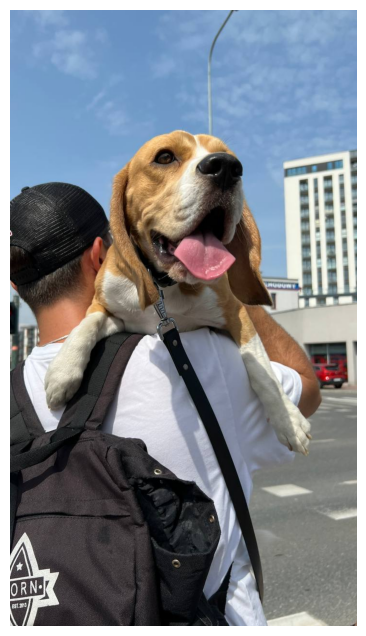

In [136]:
for detection_idx in range(len(detections)):
    coords = detections[detection_idx].get_anchor_coordinates(Position.BOTTOM_LEFT)
    x,y = coords[0][0], coords[0][1]
    print(f"Detection {detection_idx} is at (x: {x}, y: {y})")


    idx = resolve_color_idx(
            detections=detections,
            detection_idx=detection_idx,
            color_map=color_map,
            )
    color = resolve_color(color=color, idx=idx)
    print(color)


    # triangle_vertices = [
    #         (
    #             x - triangle_marker_width[0] // 2,
    #             y - triangle_marker_height - triangle_marker_margin,
    #         ),
    #         (x, y - triangle_marker_margin),
    #         (
    #             x + triangle_marker_width[0] // 2,
    #             y - triangle_marker_height - triangle_marker_margin,
    #         ),
    #     ]   
    
    # print(triangle_vertices)

    contour = np.ones((3, 2), dtype=np.int32)
    contour[0][0] = x - triangle_marker_width // 2
    contour[0][1] = y - triangle_marker_height - triangle_marker_margin
    contour[1][0] = x 
    contour[1][1] = y - triangle_marker_margin
    contour[2][0] = x + triangle_marker_width // 2
    contour[2][1] = y - triangle_marker_height - triangle_marker_margin

    print(contour)
    print(contour.shape)
    
    cv2.drawContours(
                image=image.copy(),
                contours = [contour], #[np.array(triangle_vertices, dtype=np.int32)],
                contourIdx=0,
                color= color.as_bgr(),
                thickness=thickness,
            )
    
plot_image(image=image, size=(8, 8))

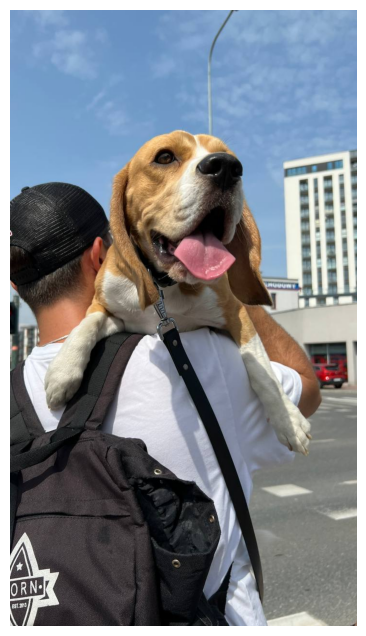

In [134]:
plot_image(image=image.copy(), size=(8, 8))

In [64]:
triangle_vertices

[(616.9617309570312, array([     758.35])),
 (626.96173, 778.350341796875),
 (636.9617309570312, array([     758.35]))]

In [ ]:
triangle_vertices = [
            (
                x - triangle_marker_width // 2,
                y - triangle_marker_height - triangle_marker_margin,
            ),
            (x, y - triangle_marker_margin),
            (
                x + triangle_marker_width // 2,
                y - triangle_marker_height - triangle_marker_margin,
            ),
        ]

In [152]:
def triangle_annotate(scene: np.ndarray, detections: Detections, position: Position = Position.TOP_CENTER) -> np.ndarray:

    from typing import List, Optional, Tuple, Union
    from supervision.draw.color import Color, ColorPalette
    from supervision.annotators.utils import (
        ColorMap,
        Trace,
        resolve_color,
        resolve_color_idx,
    )
    from supervision.detection.core import Detections
    from supervision.draw.color import Color, ColorPalette

    color = ColorPalette.default()


    thickness: int = 2
    #       position: Position = Position.TOP_CENTER,
    triangle_marker_width = int(20)
    triangle_marker_height = int(20)
    triangle_marker_margin = int(10)
    
    for detection_idx in range(len(detections)):
        coords = detections[detection_idx].get_anchor_coordinates(position)
        x,y = coords[0][0], coords[0][1]
        

        idx = resolve_color_idx(
                detections=detections,
                detection_idx=detection_idx,
                color_map=color_map,
                )
        color = resolve_color(color=color, idx=idx)
        

        contour = np.ones((3, 2), dtype=np.int32)
        contour[0][0] = x - triangle_marker_width // 2
        contour[0][1] = y - triangle_marker_height - triangle_marker_margin
        contour[1][0] = x 
        contour[1][1] = y - triangle_marker_margin
        contour[2][0] = x + triangle_marker_width // 2
        contour[2][1] = y - triangle_marker_height - triangle_marker_margin


        # print(f"Detection {detection_idx} is at (x: {x}, y: {y})")
        # print(color)
        # print(contour)
        # print(contour.shape)

        cv2.drawContours(
                    image=scene,
                    contours = [contour],
                    contourIdx=0,
                    color= color.as_bgr(),
                    thickness=thickness,                )
        

        cv2.drawContours(
                image=scene,
                contours = [contour],
                contourIdx=0,
                color= color.as_bgr(),
                thickness=-1,
            )
        
    return scene


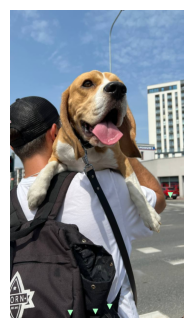

In [155]:
tri_annon = triangle_annotate(image.copy(), detections, position=Position.BOTTOM_CENTER)

plot_image(image=tri_annon, size=(4, 4))

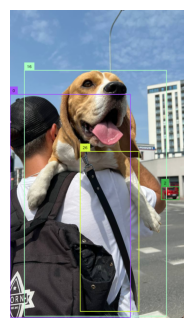

In [145]:
plot_image(image=annotated_image, size=(4, 4))

In [156]:
detections

Detections(xyxy=array([[     59.891,      250.41,      647.94,      1272.8],
       [    0.64746,      350.21,      498.83,      1277.3],
       [      290.2,      587.37,      533.97,      1252.2],
       [     626.96,      734.28,      699.47,      788.35]], dtype=float32), mask=None, confidence=array([    0.79679,     0.69055,     0.68981,     0.44159], dtype=float32), class_id=array([16,  0, 26,  2]), tracker_id=None)